<a href="https://colab.research.google.com/github/kavdoot/CODSOFT_intern/blob/main/titianic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [4]:

# Display initial information about the dataset
print(df.head())          # Show the first few rows of the dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.info())          # Show summary information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.describe())      # Show basic statistical details of the dataset
print(df.isnull().sum())  # Show the number of missing values in each column

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

In [7]:

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)             # Fill missing Age values with the median age
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked values with the mode (most frequent value)
df['Fare'].fillna(df['Fare'].median(), inplace=True)           # Fill missing Fare values with the median fare

In [8]:

# Drop columns with too many missing values
df.drop(columns=['Cabin', 'Ticket'], inplace=True)  # Drop Cabin and Ticket columns due to high number of missing values

In [9]:

# Encode categorical variables
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Encode 'Sex' column to numerical values (0 for female, 1 for male)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # Convert 'Embarked' column to dummy variables


In [10]:

# Drop irrelevant columns
df.drop(columns=['Name', 'PassengerId'], inplace=True)  # Drop 'Name' and 'PassengerId' columns as they are not useful for prediction


In [11]:


# Split features and target variable
X = df.drop(columns='Survived')  # Features (independent variables)
y = df['Survived']               # Target variable (dependent variable)

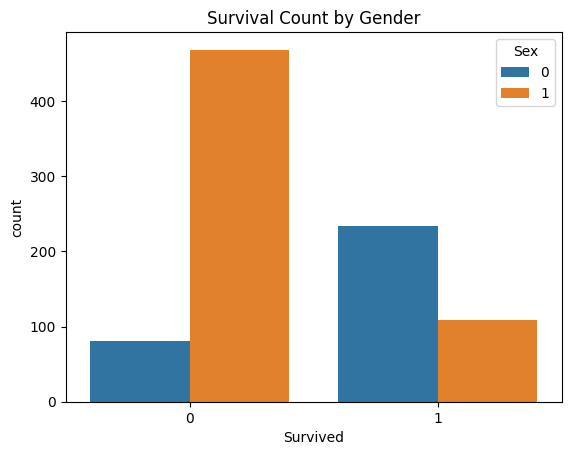

In [12]:
# Visualize survival rate by gender
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.show()

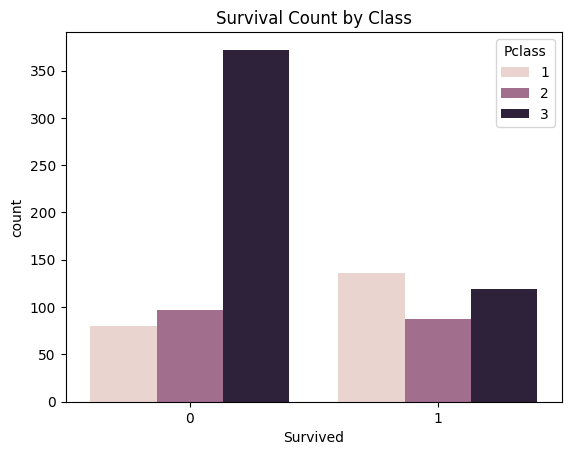

In [13]:

# Visualize survival rate by class
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Survival Count by Class')
plt.show()

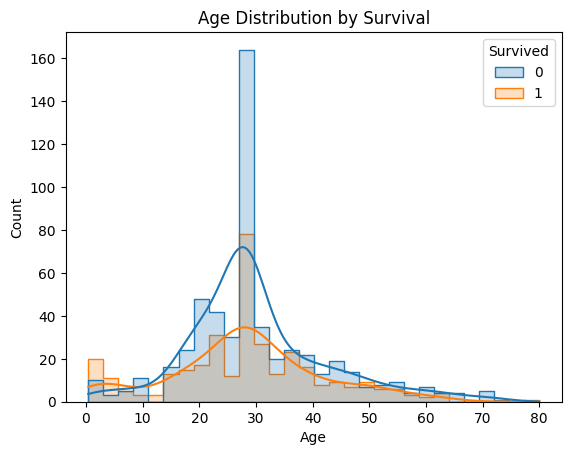

In [14]:

# Visualize age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, element='step')
plt.title('Age Distribution by Survival')
plt.show()

In [15]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training set and transform it
X_test = scaler.transform(X_test)        # Transform the test set using the same scaler


In [17]:

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)  # Train the model on the training data

LogisticRegression(random_state=42)

In [18]:

# Make predictions on the test set
y_pred = model.predict(X_test)


In [19]:

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



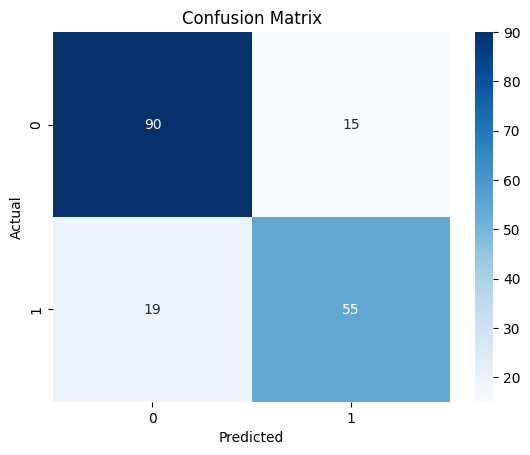

In [20]:

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:

# Create a larger sample data for prediction
sample_data = pd.DataFrame({
    'Pclass': [3, 1, 2, 3, 1],
    'Sex': [1, 0, 1, 0, 1],  # 1: male, 0: female
    'Age': [22, 38, 26, 35, 50],
    'SibSp': [1, 1, 0, 0, 1],
    'Parch': [0, 0, 0, 0, 0],
    'Fare': [7.25, 71.2833, 13.0, 8.05, 76.7292],
    'Embarked_Q': [0, 0, 0, 0, 0],
    'Embarked_S': [1, 0, 1, 1, 1]
})

In [22]:

# Scale sample data
sample_data_scaled = scaler.transform(sample_data)


In [24]:

# Make predictions on sample data
sample_predictions = model.predict(sample_data_scaled)

In [25]:

# Convert predictions to readable format
sample_results = ['Survived' if pred == 1 else 'Not Survived' for pred in sample_predictions]


In [28]:

# Append results to sample data
sample_data['Prediction'] = sample_results
print(sample_data)

   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  \
0       3    1   22      1      0   7.2500           0           1   
1       1    0   38      1      0  71.2833           0           0   
2       2    1   26      0      0  13.0000           0           1   
3       3    0   35      0      0   8.0500           0           1   
4       1    1   50      1      0  76.7292           0           1   

     Prediction  
0  Not Survived  
1      Survived  
2  Not Survived  
3      Survived  
4  Not Survived  
